In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banksim1/bs140513_032310.csv
/kaggle/input/banksim1/bsNET140513_032310.csv


In [2]:
df=pd.read_csv("/kaggle/input/banksim1/bsNET140513_032310.csv")

In [3]:
df.head()

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [4]:
df['fraud'].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

In [5]:
df['typeTrans'].value_counts()

typeTrans
'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: count, dtype: int64

In [6]:
legit = df[df.fraud == 0]
fraud = df[df.fraud == 1]

In [7]:
# Checking whether NaN or missing values are present
has_nan = df.isnull().any()
# 'has_nan' will be a Series containing True for columns with NaN values, False otherwise
print(has_nan)

Source       False
Target       False
Weight       False
typeTrans    False
fraud        False
dtype: bool


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded_feature = encoder.fit_transform(df['typeTrans'])
df['encoded_typeTrans'] = encoded_feature

In [9]:
df.head()

,Source,Target,Weight,typeTrans,fraud,encoded_typeTrans
0,'C1093826151','M348934600',4.55,'es_transportation',0,12
1,'C352968107','M348934600',39.68,'es_transportation',0,12
2,'C2054744914','M1823072687',26.89,'es_transportation',0,12
3,'C1760612790','M348934600',17.25,'es_transportation',0,12
4,'C757503768','M348934600',35.72,'es_transportation',0,12


In [10]:
df=df.drop(columns=['Source','Target','typeTrans'],axis=1)
print(df)

        Weight  fraud  encoded_typeTrans
0         4.55      0                 12
1        39.68      0                 12
2        26.89      0                 12
3        17.25      0                 12
4        35.72      0                 12
...        ...    ...                ...
594638   20.53      0                 12
594639   50.73      0                 12
594640   22.44      0                  2
594641   14.46      0                 12
594642   26.93      0                 12

[594643 rows x 3 columns]


In [11]:
original_value = encoder.inverse_transform([12])[0]  # Replace encoded_value with your encoded integer
print(original_value)  # This will print the original string value


'es_transportation'


In [12]:
import matplotlib.pyplot as plt

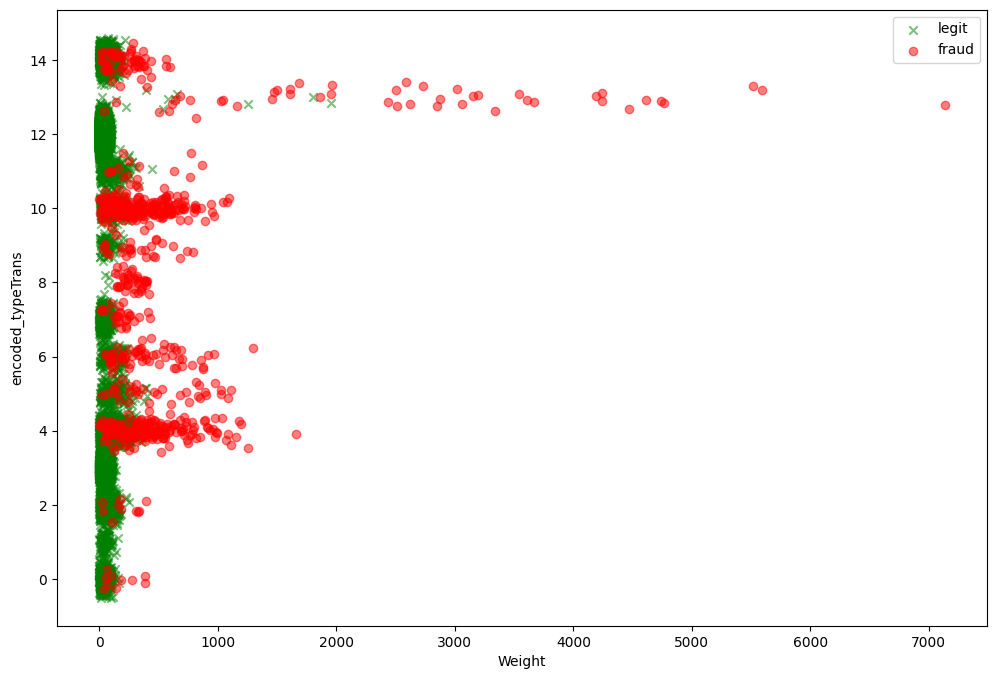

In [13]:
sampled_df = df.sample(frac=0.1, random_state=42)
plt.figure(figsize=(12, 8)) 

for target_value in sampled_df['fraud'].unique():
    subset = sampled_df[sampled_df['fraud'] == target_value]
    if target_value == 1:
        plt.scatter(subset['Weight'], subset['encoded_typeTrans'] + np.random.normal(0, 0.2, size=len(subset)), 
                    color='red', marker='o', alpha=0.5, label='fraud')
    else:
        plt.scatter(subset['Weight'], subset['encoded_typeTrans'] + np.random.normal(0, 0.2, size=len(subset)), 
                    color='green', marker='x', alpha=0.5, label='legit')

plt.xlabel('Weight')
plt.ylabel('encoded_typeTrans')
plt.legend()
plt.show()

In [14]:
X=df.iloc[:,0:3:2]
y=df.iloc[:,1]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import  RepeatedKFold
import seaborn as sns

# Random Forest classifier 

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [18]:
rf.score(X_test,y_test)

0.9921213497128539

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117494
           1       0.68      0.65      0.67      1435

    accuracy                           0.99    118929
   macro avg       0.84      0.82      0.83    118929
weighted avg       0.99      0.99      0.99    118929



In [20]:
# Performing Repeated k-fold cross validation to check for overfitting 
n_splits = 5
n_repeats = 3
scores=[]
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
mean_accuracy = np.mean(scores)
print("Average Accuracy:", mean_accuracy)

Average Accuracy: 0.9920624645059325


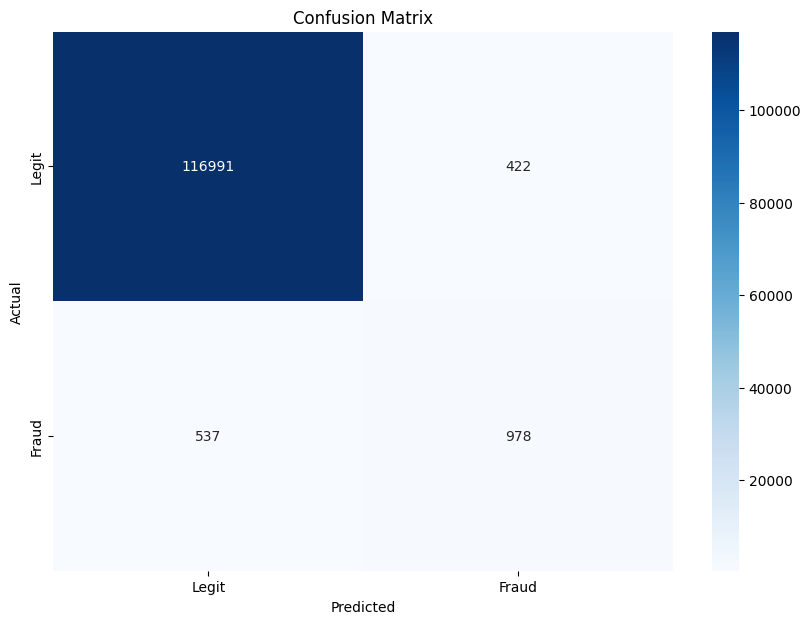

In [21]:
cm_rf= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

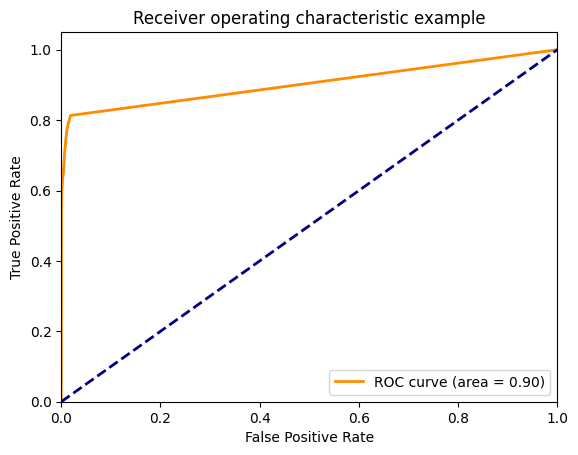

In [22]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [23]:
#prediction on new data inputted
new_data = pd.DataFrame({'Weight': [324.50],'encoded_typeTrans':[4]})
# Make prediction
prediction = rf.predict(new_data)

print("Prediction:", prediction)

Prediction: [1]


# LOGISTIC REGRESSION

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [27]:
lr.score(X_test,y_test)

0.99336578967283

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117494
           1       0.86      0.54      0.66      1435

    accuracy                           0.99    118929
   macro avg       0.93      0.77      0.83    118929
weighted avg       0.99      0.99      0.99    118929



In [29]:
# Performing Repeated k-fold cross validation to check for overfitting 
n_splits = 5
n_repeats = 3
scores=[]
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
mean_accuracy = np.mean(scores)
print("Average Accuracy:", mean_accuracy)

Average Accuracy: 0.9934319135453376


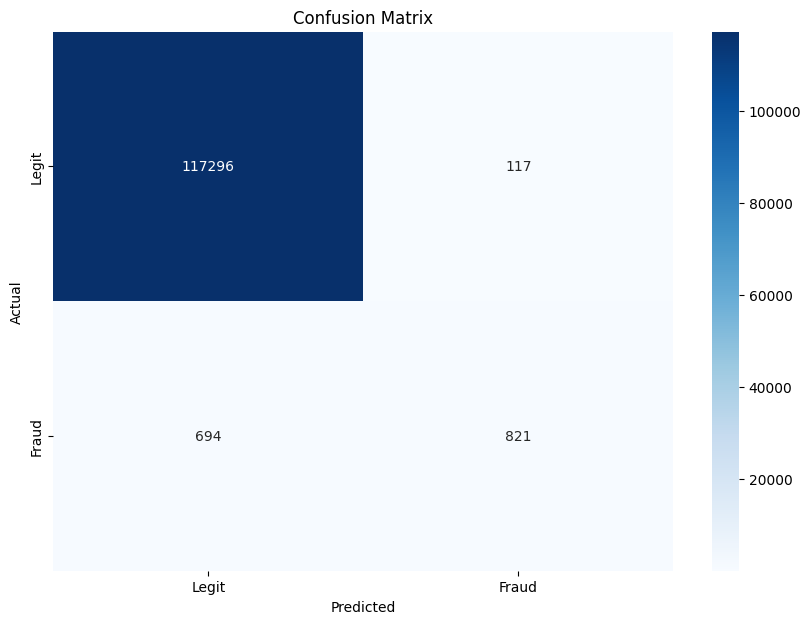

In [30]:
cm_lr= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

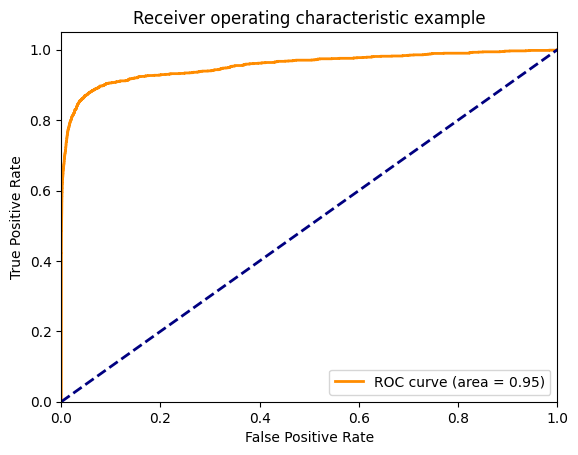

In [31]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# KNN CLASSIFIER

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17,test_size=0.2)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [35]:
knn.score(X_test,y_test)

0.9941309520806532

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117494
           1       0.85      0.63      0.72      1435

    accuracy                           0.99    118929
   macro avg       0.92      0.81      0.86    118929
weighted avg       0.99      0.99      0.99    118929



In [37]:
# Performing Repeated k-fold cross validation to check for overfitting 
n_splits = 5
n_repeats = 3
scores=[]
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
mean_accuracy = np.mean(scores)
print("Average Accuracy:", mean_accuracy)

Average Accuracy: 0.9941612025444272


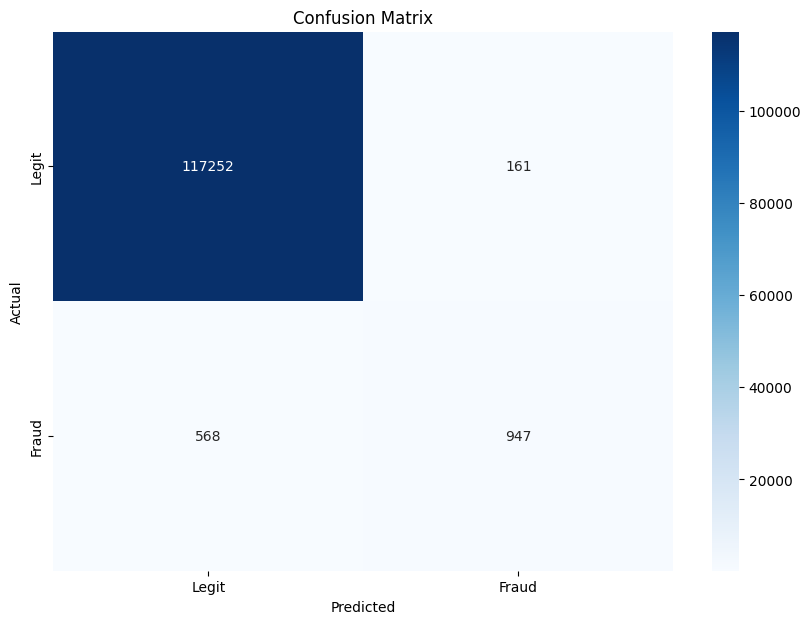

In [38]:
cm_knn= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

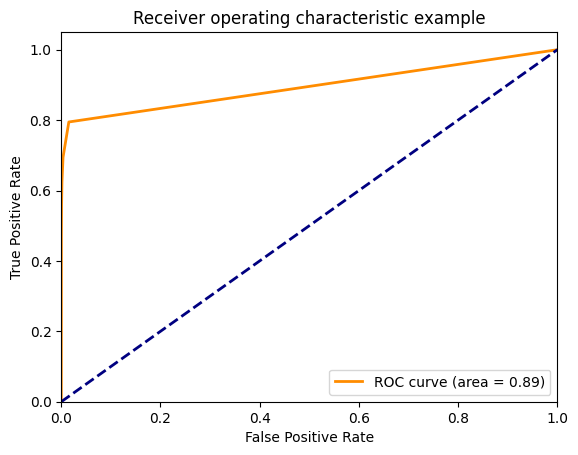

In [39]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
#Based on ROC curve logistic regression model performs well with test data or unseen data.